## Statistics Exercises

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### How likely is it that you roll doubles when rolling two dice?

In [173]:
# 1. Represent data 1-6
# 2. Create the matrix

dice_sample = pd.DataFrame(np.random.choice([1, 2, 3, 4, 5, 6], size=(1000, 2)))
dice_sample.head()

,0,1
0,4,3
1,1,1
2,3,5
3,2,4
4,6,5


In [3]:
dice_sample[0] == dice_sample[1]

0       True
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [4]:
(dice_sample[0] == dice_sample[1]).mean()

0.165

### If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [5]:
# 1. Represent data -- 0 is tails, 1 is heads
# 2. Create the matrix

flips = np.random.choice([0,1], size=(10_000, 8))
flips

array([[1, 1, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 1]])

In [6]:
simulation_results = flips.sum(axis=1)
simulation_results

array([5, 6, 4, ..., 3, 5, 7])

In [7]:
(simulation_results == 3).mean()

0.217

In [8]:
(simulation_results > 3).mean()

0.6386

### There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [39]:
# 1. Represent data 1 = DS, 0 = WD
# 2. Create the matrix
n_rows = 10_000
n_cols = 2

cohorts = np.random.choice([1, 0, 0, 0], n_rows * n_cols).reshape(n_rows, n_cols)
cohorts

array([[1, 1],
       [0, 1],
       [0, 0],
       ...,
       [0, 1],
       [0, 0],
       [1, 0]])

In [40]:
billboards_2_ds = ((cohorts.sum(axis = 1) == 2).mean())
billboards_2_ds

0.0689

### Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

In [77]:
# 1. Represent data 
# 2. Create the matrix
poptarts = np.random.normal(3, 1.5, (1000000,5))
poptarts = np.where(poptarts < 0, 0, poptarts)
purchase_poptarts = poptarts.round(0)
purchase_poptarts

array([[3., 1., 5., 1., 3.],
       [3., 4., 5., 4., 4.],
       [2., 2., 3., 0., 4.],
       ...,
       [4., 5., 4., 4., 0.],
       [3., 5., 3., 3., 7.],
       [4., 6., 4., 2., 3.]])

In [96]:
poptarts_left = ((purchased_poptarts.sum(1) <= 16).mean())
poptarts_left

0.670521

### Compare Heights

- Men have an average height of 178 cm and standard deviation of 8cm.
- Women have a mean of 170, sd = 6cm.
- If a man and woman are chosen at random, P(woman taller than man)?

In [41]:
# 1. Represent data
# 2. Create the matrix

men = np.random.normal(178, 8, 100_000)
women = np.random.normal(170, 6, 100_000)
woman_taller = (women > men).mean()
woman_taller

0.21311

### When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

### What is the probability that we observe an installation issue within the first 150 students that download anaconda?

### How likely is it that 450 students all download anaconda without an issue?

In [141]:
# 1. Represent data
# 2. Create the matrix

n_rows = 10_000

def anaconda_installs(trials):
    return np.random.choice(249 * [False]  + [True], (n_rows, trials))

In [142]:
trials_50 = anaconda_installs(50)
trials_50.sum(axis = 1)

array([0, 0, 0, ..., 0, 0, 0])

In [143]:
(trials_50.sum(axis = 1) == 0).mean()

0.8206

In [144]:
trials_100 = anaconda_installs(100)
trials_100.sum(axis = 1)

array([2, 0, 0, ..., 0, 0, 2])

In [145]:
1 - (trials_100.sum(axis = 1) == 0).mean()

0.3355

In [146]:
trials_450 = anaconda_installs(450)
trials_450.sum(axis = 1)

array([1, 1, 1, ..., 3, 1, 2])

In [147]:
(trials_450.sum(axis = 1) == 0).mean()

0.1689

### There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

### How likely is it that a food truck will show up sometime this week?

In [123]:
# 1. Represent data
# 2. Create the matrix

days = np.random.choice([0 ,1], size=(10_000, 3), p=(.3, .7))
days

array([[0, 1, 0],
       [1, 1, 1],
       [1, 0, 1],
       ...,
       [1, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [124]:
(days.sum(axis = 1) == 0).mean()

0.0285

### If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [174]:
# 1. Represent data
# 2. Create the matrix

random_23_birthdays = np.random.randint(0,365,(10_000,23))
random_23_birthdays

array([[359,  48,  25, ...,  38,  86, 141],
       [ 37, 303, 186, ...,   9, 249, 320],
       [290, 230, 118, ..., 129, 254,  85],
       ...,
       [ 67,  90, 297, ...,   5, 334,  96],
       [133, 246, 252, ..., 189, 216, 188],
       [ 64, 290,  52, ..., 297,  78, 122]])

In [175]:
random_23 = pd.DataFrame(random_23_birthdays)
random_23

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,359,48,25,90,172,48,333,6,290,214,...,321,6,191,130,76,245,314,38,86,141
1,37,303,186,212,147,165,168,227,11,107,...,305,228,21,27,174,325,0,9,249,320
2,290,230,118,177,185,46,10,161,314,82,...,303,214,321,55,57,167,105,129,254,85
3,346,143,283,322,264,163,198,201,275,138,...,97,16,209,122,82,126,340,140,178,199
4,37,52,53,147,271,136,305,157,55,110,...,86,84,15,77,250,21,268,358,25,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,46,273,129,95,140,34,151,225,35,67,...,96,294,224,335,353,32,260,174,235,236
9996,81,59,78,56,345,201,106,254,222,149,...,240,72,261,361,285,57,120,339,239,337
9997,67,90,297,68,361,324,313,114,194,168,...,286,220,75,285,234,291,117,5,334,96
9998,133,246,252,24,145,17,362,86,281,140,...,223,45,310,20,296,242,322,189,216,188


In [176]:
shared_birthdays_23 = random_23.apply(lambda x: len(set(x)) != len(x), axis=1).mean()
shared_birthdays_23

0.505

In [177]:
random_20_birthdays = np.random.randint(0,366,(10_000,20))
random_20_birthdays

array([[235,  58, 288, ...,  60, 271,  65],
       [109, 285, 233, ..., 268, 132,  49],
       [282, 101, 316, ..., 221,  34, 153],
       ...,
       [126, 324, 135, ..., 285, 280, 240],
       [245,  71, 224, ..., 335, 251, 284],
       [ 45, 205,  69, ..., 298, 246, 275]])

In [178]:
random_20 = pd.DataFrame(random_20_birthdays)
random_20

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,235,58,288,151,290,320,299,355,361,204,268,365,236,79,290,349,99,60,271,65
1,109,285,233,189,126,187,353,204,359,253,316,18,282,351,286,50,18,268,132,49
2,282,101,316,335,291,157,326,94,44,29,115,111,44,16,242,226,149,221,34,153
3,2,317,76,65,257,83,30,179,211,37,258,167,30,113,20,26,272,175,227,103
4,255,61,153,48,313,230,245,159,181,253,49,51,230,52,326,253,61,315,303,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,318,64,264,64,359,98,360,365,351,332,357,141,240,302,7,84,74,300,360,14
9996,128,238,117,271,223,85,198,42,68,77,324,0,38,329,185,355,22,35,254,202
9997,126,324,135,168,350,327,301,86,302,309,262,170,83,145,130,244,99,285,280,240
9998,245,71,224,281,268,361,362,241,364,133,47,337,289,233,112,341,226,335,251,284


In [179]:
shared_birthdays_20 = random_20.apply(lambda x: len(set(x)) != len(x), axis=1).mean()
shared_birthdays_20

0.4143

In [170]:
random_40_birthdays = np.random.randint(0,366,(10_000,40))
random_40_birthdays

array([[ 59,  15, 215, ..., 329, 256,  15],
       [ 82,  29, 163, ...,  23, 184, 216],
       [179, 147, 208, ...,  55, 283,   8],
       ...,
       [ 22, 347, 159, ..., 261,  25, 238],
       [331, 131,  24, ...,  87, 183,  54],
       [ 35,  75, 292, ..., 145, 114, 282]])

In [171]:
random_40 = pd.DataFrame(random_40_birthdays)
random_40

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,59,15,215,98,289,101,312,147,136,155,...,359,310,238,196,69,36,255,329,256,15
1,82,29,163,253,154,78,204,107,186,298,...,33,240,114,29,8,16,205,23,184,216
2,179,147,208,161,141,146,194,177,326,10,...,268,361,58,260,210,163,32,55,283,8
3,272,277,277,55,41,197,236,108,172,356,...,321,227,178,15,285,238,283,54,127,137
4,15,149,38,259,198,276,235,0,265,65,...,192,195,99,134,338,200,55,320,335,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,260,89,348,157,105,342,353,146,307,115,...,258,292,147,132,13,330,156,77,227,19
9996,16,260,98,98,22,64,192,55,185,4,...,108,266,103,343,294,306,242,250,54,270
9997,22,347,159,81,51,269,363,362,350,106,...,13,346,144,217,248,273,239,261,25,238
9998,331,131,24,140,17,355,297,119,326,81,...,199,161,18,164,72,42,72,87,183,54


In [172]:
shared_birthdays_40 = random_40.apply(lambda x: len(set(x)) != len(x), axis=1).mean()
shared_birthdays_40

0.8945

In [5]:
mage_1_health = np.random.choice([1,2,3,4], size=(1, 6))
mage_1_health

array([[2, 1, 3, 3, 1, 4]])

In [8]:
d = {'roll': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'probability': [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]}
df = pd.DataFrame(data=d)
df

,roll,probability
0,2,1
1,3,2
2,4,3
3,5,4
4,6,5
5,7,6
6,8,5
7,9,4
8,10,3
9,11,2


In [11]:
sns.distplot(x='roll', y='probability', data=df)

TypeError: distplot() got an unexpected keyword argument 'x'

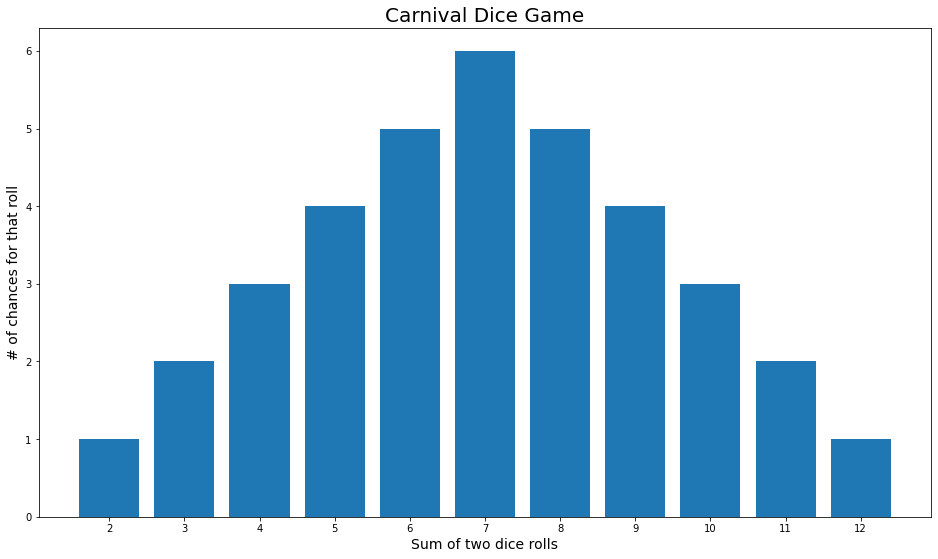

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure(figsize=(16, 9))

plt.bar(df.roll, df.probability)

plt.title("Carnival Dice Game", fontsize=20)
plt.ylabel("# of chances for that roll", fontsize=14)
plt.xlabel("Sum of two dice rolls", fontsize=14)
plt.xticks([2,3,4,5,6,7,8,9,10,11,12])

plt.show()

plt.savefig('dice_outcome')